In [2]:
!rm -rf DL_Data_sets/
!git clone --branch images https://github.com/octavio-navarro/DL_Data_sets.git

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 64969, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 64969 (delta 13), reused 493 (delta 9), pack-reused 64469 (from 1)
Receiving objects: 100% (64969/64969), 1.54 GiB | 28.06 MiB/s, done.
Resolving deltas: 100% (136/136), done.


# Masking

Using a mask allows us to focus only on the portions of the image that interests us. For example, let’s say that we were building a computer vision system to recognize faces. The only part of the image we are interested in finding and describing are the parts of the image that contain faces – we simply don’t care about the rest of the content of the image. Provided that we could find the faces in the image, we might construct a mask to show only the faces in the image.



### Import resources

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

## Color Threshold, Blue Screen

In this case, we are going to create a mask that consists of all the pixels that are within a specific range of blues, and use that to change the background to something else.

<tr>
<td> <img src="https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/pizza_bluescreen.jpg" alt="Pizza blue background" width=500px/> </td>
<td> <img src="https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/pizza_newbackground.png" alt="Pizza new background" width = 550px/> </td>
</tr>

### Read in and display the image

In [4]:
# Read in the image
image = cv2.imread('DL_Data_sets/images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print(f'This image is: {type(image)} with dimensions:  {image.shape}')

This image is: <class 'numpy.ndarray'> with dimensions:  (514, 816, 3)


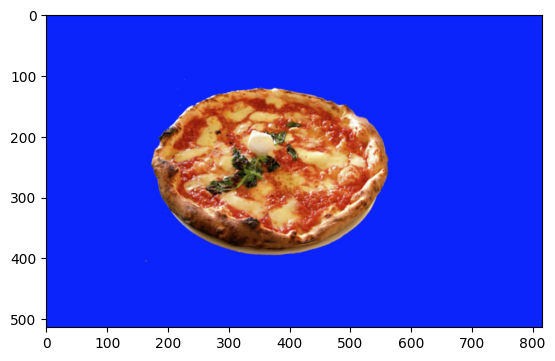

In [5]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### Define the color threshold

In [6]:
# Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,180])
upper_blue = np.array([70,70,255])

### Create a mask

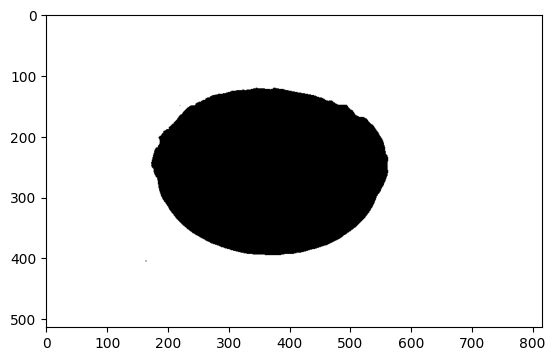

In [7]:
# Define the masked area
# The inRange method checks if array elements lie between the elements of two other arrays. In this case, checks whether a pixel is within two other colors.
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


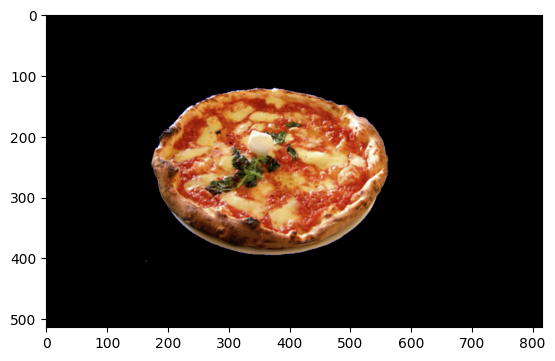

In [8]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

# Getting some elements out of an existing array and creating a new array out of them is called filtering.
# In NumPy, you can filter an array using a boolean index list. I this case, we can use a boolean condition to generate said index list.
filter = mask != 0

print(filter)

masked_image[filter] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

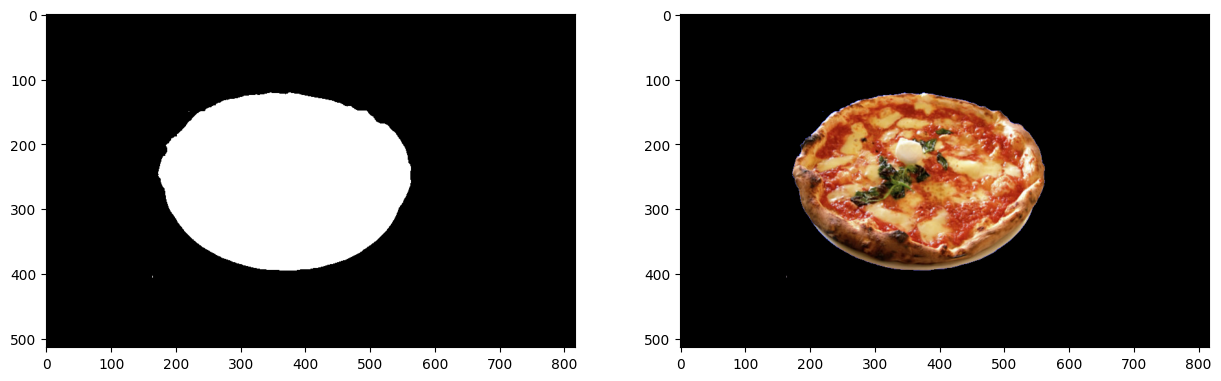

In [9]:
# Mask the image to let the pizza show through
masked_image_bitwise = np.copy(image_copy)

# You can use bitwise operations to apply the mask.
mask_inverted = cv2.bitwise_not(mask)
masked_image_bitwise = cv2.bitwise_and(masked_image_bitwise, masked_image_bitwise, mask=mask_inverted)

f, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(mask_inverted, cmap='gray')
axes[1].imshow(masked_image_bitwise)

### Mask and add a background image

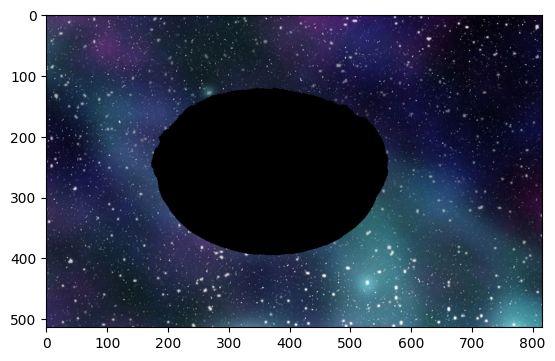

In [10]:
# Load in a background image, and convert it to RGB
background_image = cv2.imread('DL_Data_sets/images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

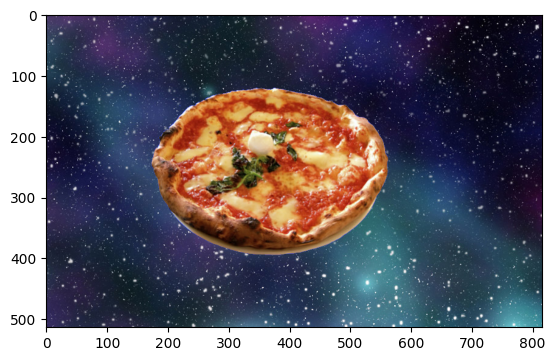

In [11]:
# Add the two images together to create a complete image
complete_image = crop_background + masked_image

# Display the result
plt.imshow(complete_image)

## Challenge

Using the images found in the "Segmentation masks" folder of the [DL Data sets repo](https://github.com/octavio-navarro/DL_Data_sets/), extract the masks using the following table.


|name |	r |	g |	b |
|---|---|---|---|
|urban_land |	0| 	255|	255|
|agriculture_land|	255|	255|	0|
|rangeland|	255|	0|	255|
|forest_land|	0|	255|	0|
|water|	0|	0|	255|
|barren_land|	255|	255|	255|
|unknown|	0|	0|	0|

The result should look something like this:

![](https://raw.githubusercontent.com/octavio-navarro/DL_Data_sets/images/images/SegmentationMasks/class_masks.png)

**TIPS**:
1. Check the image size.
2. Remember the type of the masks.
3. Since we are working with a mask with 3 channels, check [numpy.all](https://numpy.org/doc/stable/reference/generated/numpy.all.html) to create a filter.

In [12]:
import glob

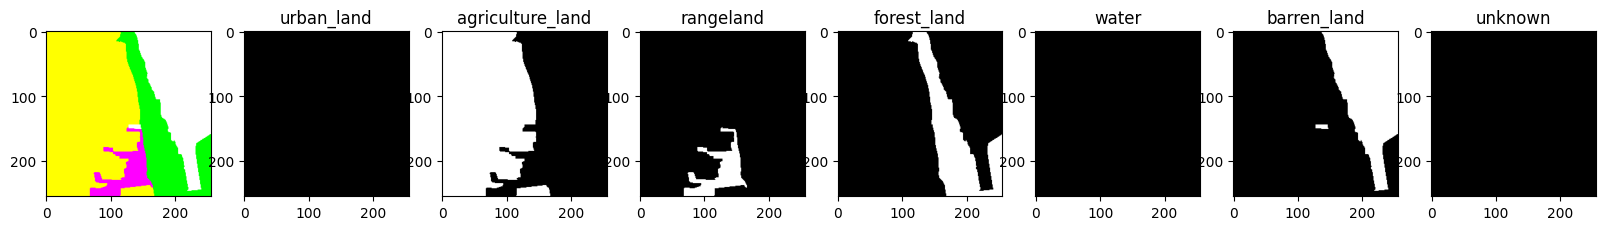

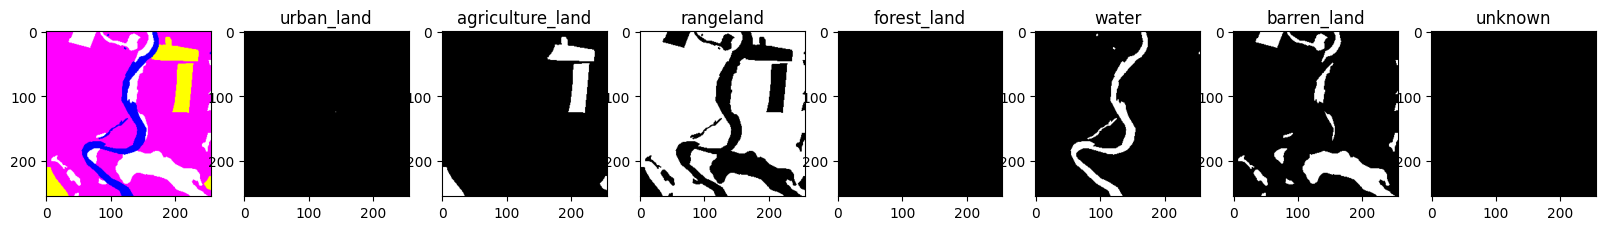

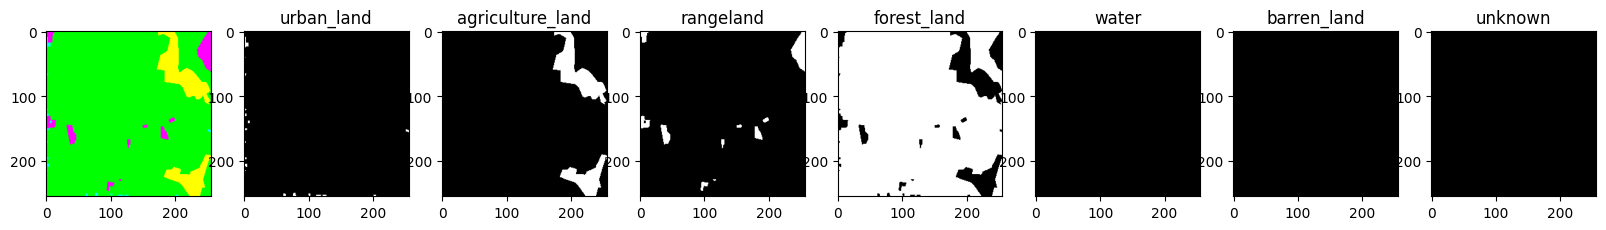

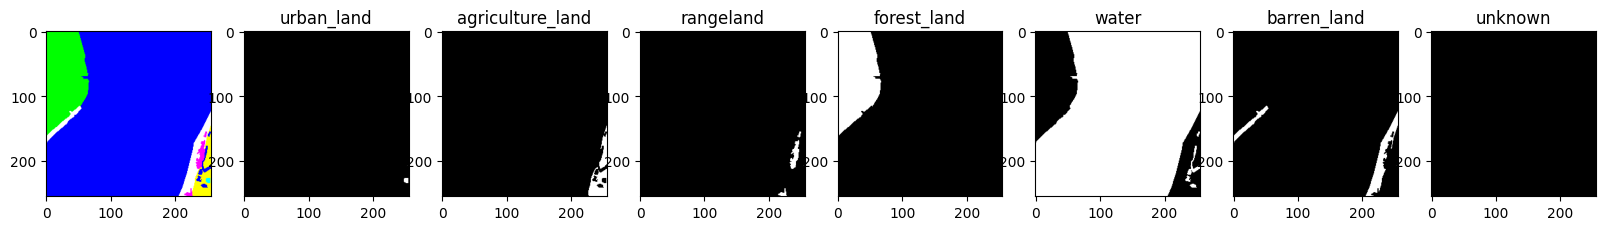

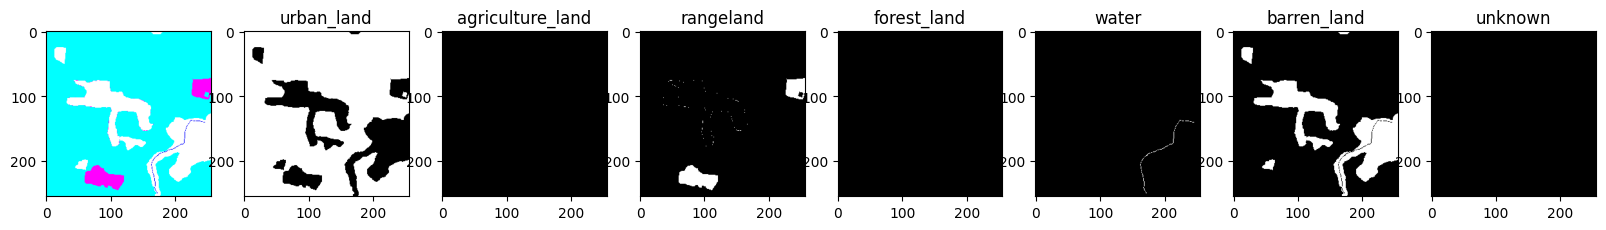

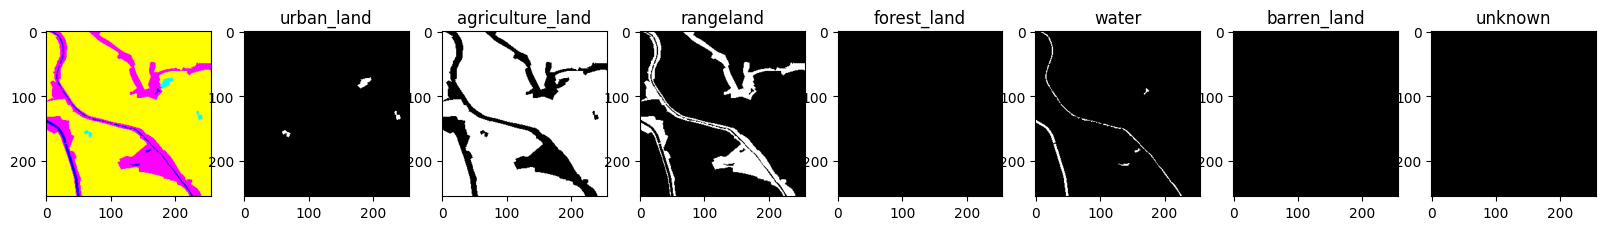

In [22]:
image_paths = glob.glob('/content/DL_Data_sets/images/SegmentationMasks/*_mask.png')

rgb_filter_values = [
    {"name": "urban_land", "min": np.array([0, 127, 127]),"max": np.array([127, 255, 255])},
    {"name": "agriculture_land","min": np.array([127, 127, 0]), "max": np.array([255, 255, 127])},
    {"name": "rangeland", "min": np.array([127, 0, 127]), "max": np.array([255, 127, 255])},
    {"name": "forest_land","min":np.array([0, 127, 0]), "max": np.array([127, 255, 127])},
    {"name": "water", "min": np.array([0, 0, 127]), "max": np.array([127, 127, 255]) },
    {"name": "barren_land", "min": np.array([127, 127, 127]),"max": np.array([255, 255, 255])},
    {"name": "unknown", "min":np.array([0, 0, 0]), "max":np.array([255, 255, 255])}
]

for path in image_paths:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))

    f, ax = plt.subplots(1,8, figsize=(20, 10))
    ax[0].imshow(image)

    for i in range(1, 8):
        copy = image.copy()
        f = rgb_filter_values[i-1]
        mask = cv2.inRange(copy, f["min"], f["max"])
        filter = mask != 0
        ax[i].imshow(filter, cmap='gray')
        ax[i].set_title(f["name"])
